# Categorical features with Decision Tree Classifier

This notebook was written by Gael Lederrey and Tim Hillel (tim.hillel@epfl.ch) for the Decision-aid methodologies in transportation course at EPFL (http://edu.epfl.ch/coursebook/en/decision-aid-methodologies-in-transportation-CIVIL-557).

Please contact before distributing or reusing the material below.

## Overview

In this notebook, we will fit and investigate a Decision Tree Classifier using the full dataset (including the categorical variables) in order to predict the travel mode taken.

The notebook will cover:
1. Numerical and binary encoding of categorical variables
2. External validation and train-validate-test
3. Use of the Decision Tree Classifier

## Set-up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data, and set index to trip_id column

df = pd.read_csv('data/dataset.csv', index_col='trip_id')

## Data processing

As discussed in the lecture, we will be working with all of the features in the dataset, including categorical features. 

Use the `dtypes` method on the dataframe `df` to investigate which features are likely to be categorical. 

You can look at those columns to see if your guess is correct (remember the `head` method!).

In [3]:
# Enter your code here
display(df.dtypes)
display(df[['travel_mode','purpose', 'fueltype', 'faretype']].head())

household_id                 int64
person_n                     int64
trip_n                       int64
travel_mode                 object
purpose                     object
fueltype                    object
faretype                    object
bus_scale                  float64
survey_year                  int64
travel_year                  int64
travel_month                 int64
travel_date                  int64
day_of_week                  int64
start_time_linear          float64
age                          int64
female                       int64
driving_license              int64
car_ownership                int64
distance                     int64
dur_walking                float64
dur_cycling                float64
dur_pt_total               float64
dur_pt_access              float64
dur_pt_rail                float64
dur_pt_bus                 float64
dur_pt_int_total           float64
dur_pt_int_waiting         float64
dur_pt_int_walking         float64
pt_n_interchanges   

travel_mode purpose    fueltype faretype
trip_id                                         
0             drive     HBO  Petrol_Car     full
1             drive     HBO  Petrol_Car     full
2             drive     HBO  Petrol_Car     full
3             drive     HBO  Petrol_Car     full
4             drive     HBO  Petrol_Car      dis

#### Numerical encoding

One of the categorical values is our ***target***, `travel_mode`. 

As such, for this column we want to use *linear encoding*. 

Using a dictionary, and the `replace` method in Pandas, encode the `travel_mode` column numerically, so that *walk* is 0, *cycle* is 1, *pt* is 2, and *drive* is 3. 

*Hint*: Look at the `inplace` argument for the `replace` method!

In [4]:
# Enter your code below

str_to_val = {
    'walk': 0,
    'cycle': 1,
    'pt': 2,
    'drive': 3
}

df.travel_mode.replace(str_to_val, inplace=True)

df.head()

household_id  person_n  trip_n  travel_mode purpose    fueltype  \
trip_id                                                                    
0                   0         0       0            3     HBO  Petrol_Car   
1                   0         0       1            3     HBO  Petrol_Car   
2                   0         0       2            3     HBO  Petrol_Car   
3                   0         0       3            3     HBO  Petrol_Car   
4                   0         1       2            3     HBO  Petrol_Car   

        faretype  bus_scale  survey_year  travel_year  ...  dur_pt_int_total  \
trip_id                                                ...                     
0           full        1.0            1         2012  ...               0.0   
1           full        1.0            1         2012  ...               0.0   
2           full        1.0            1         2012  ...               0.0   
3           full        1.0            1         2012  ...               0.0   
4            dis        1.0            1         2012  ...               0.0   

         dur_pt_int_waiting  dur_pt_int_walking  pt_n_interchanges  \
trip_id                                                              
0                       0.0                 0.0                  0   
1                       0.0                 0.0                  0   
2                       0.0                 0.0                  0   
3                       0.0                 0.0                  0   
4                       0.0                 0.0                  0   

         dur_driving  cost_transit  cost_driving_total  cost_driving_fuel  \
trip_id                                                                     
0           0.052222           1.5                0.14               0.14   
1           0.059444           1.5                0.15               0.15   
2           0.236667           1.5                0.79               0.79   
3           0.233333           1.5                0.78               0.78   
4           0.229167           1.5                0.78               0.78   

         cost_driving_con_charge  driving_traffic_percent  
trip_id                                                    
0                            0.0                 0.111702  
1                            0.0                 0.112150  
2                            0.0                 0.203052  
3                            0.0                 0.160714  
4                            0.0                 0.130909  

[5 rows x 35 columns]

### Binary encoding

Now we will use *binary encoding* (also known as *one-hot encoding* to turn each of the three remaining categorical features into $n$ binary columns. 

Use a *colon* (:) as the separator for each categorical value (e.g. `faretype:full`), and store the finished dataframe (including all features) as `df_processed`.

*Hint: Look at the pandas **function** `get_dummies`*

In [5]:
categorical_cols = ['purpose', 'fueltype', 'faretype']

# Enter your code below

df_processed = pd.get_dummies(
    df, prefix_sep=':', columns=categorical_cols)

df_processed.head()

household_id  person_n  trip_n  travel_mode  bus_scale  survey_year  \
trip_id                                                                        
0                   0         0       0            3        1.0            1   
1                   0         0       1            3        1.0            1   
2                   0         0       2            3        1.0            1   
3                   0         0       3            3        1.0            1   
4                   0         1       2            3        1.0            1   

         travel_year  travel_month  travel_date  day_of_week  ...  \
trip_id                                                       ...   
0               2012             4            1            7  ...   
1               2012             4            1            7  ...   
2               2012             4            1            7  ...   
3               2012             4            1            7  ...   
4               2012             4            1            7  ...   

         fueltype:Diesel_Car  fueltype:Diesel_LGV  fueltype:Hybrid_Car  \
trip_id                                                                  
0                          0                    0                    0   
1                          0                    0                    0   
2                          0                    0                    0   
3                          0                    0                    0   
4                          0                    0                    0   

         fueltype:Petrol_Car  fueltype:Petrol_LGV  faretype:16+  \
trip_id                                                           
0                          1                    0             0   
1                          1                    0             0   
2                          1                    0             0   
3                          1                    0             0   
4                          1                    0             0   

         faretype:child  faretype:dis  faretype:free  faretype:full  
trip_id                                                              
0                     0             0              0              1  
1                     0             0              0              1  
2                     0             0              0              1  
3                     0             0              0              1  
4                     0             1              0              0  

[5 rows x 48 columns]

### Train-validate-test and external validation

In order to create a test set which represents *external validation*, we will separate out the first two years of data  from the final (third) year of data. 

The first two years are considered as the *training/validation* set. The final test year is used as the unseen *holdout test* set for your finished model.

Separate the data into two separate dataframes:
* `train_validate` for `survey_year == < 3`
* `test` for `survey_year == 3`

Save these as `train_validate.csv` and `test.csv` respectively (remember to store them inside the data folder)!

*Hint: remember to use `df_processed` and not `df`!*

In [6]:
# Enter your code below

msk = df_processed['survey_year'] < 3

train_validate = df_processed[msk]
test = df_processed[~msk]

train_validate.to_csv('data/train_validate.csv')
test.to_csv('data/test.csv')

The dataset contains several *ID* and *context* columns, which are not useful as *features* to predict mode choice. As such, these columns should not be included in the model input. 

The following code creates two new dataframes, `y` (the target), and `X` (features). 

Check you understand how it works (including the list comprehension!)

In [7]:
target = ['travel_mode']
id_context = ['trip_id', 
              'household_id', 
              'person_n', 
              'trip_n',
              'survey_year',
              'travel_year'
             ]
features = [c for c in train_validate.columns 
            if c not in (target + id_context)]

y = train_validate[target]
X = train_validate[features]

#### Train-validate split

We now need to separate the `train_validate` data into separate `train` and `validate` sets. 

This time, we can use the function `train_test_split` from `sklearn.model_selection` to split our dataset into a train and validate (test) set.

Use a `test_size` of 0.2, and a `random_state` of 42. 

In [8]:
# Enter your code below

from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

## Use and test Decision Tree

We will be using the `DecisionTreeClassifier` from the `tree` module in *scikit-learn*, as well as `accuracy score`, `precision_recall_fscore_support`, and `confusion_matrix` from the `metrics` module. 

#### Import libraries

Import the relevant functions/classes here. 

In [9]:
# Enter your code below

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

To assess the performance of our model, we can create a function that will give us the accuracy, precision, and recall together. Check you can follow how the function works.

In [10]:
classes = np.array(['walk', 'cycle', 'pt', 'drive'])

def acc_pre_rec(y_true, y_pred, verbose=False):
    ''' Returns accuracy, precision, and recall together. 
    If verbose is set to True, it prints the scores for 
    each mode.'''
    acc = accuracy_score(y_true, y_pred)
    prec, rec, fsc, sup = precision_recall_fscore_support(
        y_true, y_pred)
    
    if verbose:
        print("Accuracy: \n    {:.3f}%".format(acc*100))
        scrs = ['Precision', 'Recall']
        for i, scr in enumerate([prec, rec]):
            str_ = '%;\n    '.join(
                "{} - {:.3f}".format(classes[i], 100*s) 
                for i, s in enumerate(scr)
            )
            print("{}: \n    {}%".format(scrs[i], str_))
    else:
        return acc, prec, rec


## Using DTC

First, create an instance of the *decision tree classifier* and fit it to the training data. Use default values for all hyperparameters.

Call the classifier `dtc`

In [11]:
# Enter your code below

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Then, use the fitted model to predict the validation data. Call the predictions `y_pred`.

In [12]:
# Enter your code below

y_pred = dtc.predict(X_validate)

Here are the results. What can you see from the precision and recall? Which modes are most/least well represented in the results?

In [13]:
acc_pre_rec(y_validate, y_pred, True)

Accuracy: 
    71.517%
Precision: 
    walk - 66.304%;
    cycle - 14.986%;
    pt - 73.411%;
    drive - 76.118%
Recall: 
    walk - 67.886%;
    cycle - 17.391%;
    pt - 71.813%;
    drive - 75.978%


## Visualization

We can visualise the tree using the `graphviz` library. 

You can install graphviz and pydotplus on your computer by opening the terminal and typing

    conda install graphviz python-graphviz pydotplus
    
Do not worry if you cannot get `graphviz` working, below is an example output for `max_depth = 3`.

<img src="data/tree_md3.png">

In [14]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from graphviz import Source

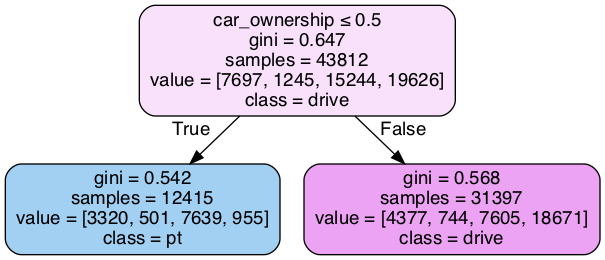

In [15]:
clf = DecisionTreeClassifier(max_depth=1, criterion="gini")
clf = clf.fit(X_train, y_train)

dot_data = export_graphviz(clf, out_file=None, 
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train.columns,
                class_names = classes)
graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(graph.create_png())
display(img)

Let's change the criterion for measuring the quality of the split and use the entropy

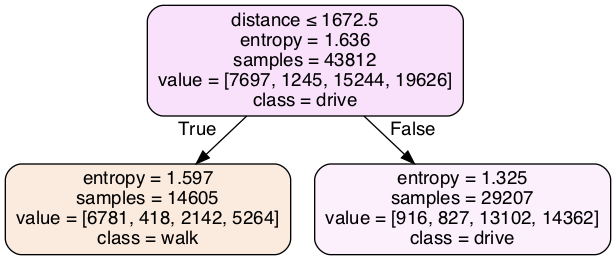

In [16]:
clf = DecisionTreeClassifier(max_depth=1, criterion="entropy")
clf = clf.fit(X_train, y_train)

dot_data = export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train.columns,
                class_names = classes)
graph = pydotplus.graph_from_dot_data(dot_data)  
img = Image(graph.create_png())
display(img)

***What is happening?***

## Viewing the confusion matrix

It can be sometimes difficult to assess the performance the model by simply using the accuracy, precision, and recall. Thus, it is often better to consider the *confusion matrix* as a whole. The function `plot_confusion_matrix` from *scikit-learn*'s `metrics` module plots a nicely formatted confusion matrix.

Let's plot the confusion matrix for our original classifier.

Confusion matrix, without normalization:


array([[1281,   48,  214,  344],
       [  52,   52,  104,   91],
       [ 237,  116, 2772,  735],
       [ 362,  131,  686, 3729]])

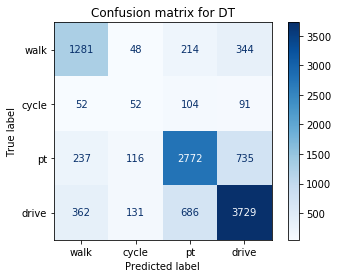

In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print('Confusion matrix, without normalization:')
display(confusion_matrix(y_validate, y_pred))

fig, ax = plt.subplots()
plot_confusion_matrix(dtc, X_validate, y_validate, display_labels= classes, values_format= 'd', cmap=plt.cm.Blues, ax = ax)
ax.set_title('Confusion matrix for DT')
plt.show()

In [18]:
acc_pre_rec(y_validate, y_pred, verbose=True)

Accuracy: 
    71.517%
Precision: 
    walk - 66.304%;
    cycle - 14.986%;
    pt - 73.411%;
    drive - 76.118%
Recall: 
    walk - 67.886%;
    cycle - 17.391%;
    pt - 71.813%;
    drive - 75.978%


### Modifying hyperparameters

Try changing the default hyperparameters for the DTC. What happens? Can you improve the accuracy score on the validation set?

## Testing the model

Now that we have finalised our model specification, we can fit it on **ALL** of the train/validate data, and test it on the holdout test set.

In [19]:
dtc.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
y_test = test[target]
X_test = test[features]

In [21]:
y_test_pred = dtc.predict(X_test)

Confusion matrix, without normalization:


array([[2407,  192,  893, 1192],
       [ 169,   69,  372,  251],
       [ 699,  363, 6335, 2104],
       [1052,  290, 2123, 7809]])

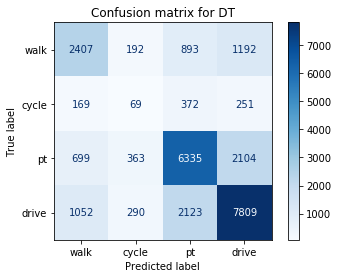

In [22]:
print('Confusion matrix, without normalization:')
display(confusion_matrix(y_test, y_test_pred))

fig, ax = plt.subplots()
plot_confusion_matrix(dtc,X_test, y_test, display_labels=classes, values_format= 'd', cmap=plt.cm.Blues, ax = ax)
ax.set_title('Confusion matrix for DT')
plt.show()

In [23]:
acc_pre_rec(y_test, y_test_pred, verbose=True)

Accuracy: 
    63.146%
Precision: 
    walk - 55.627%;
    cycle - 7.549%;
    pt - 65.155%;
    drive - 68.765%
Recall: 
    walk - 51.388%;
    cycle - 8.014%;
    pt - 66.677%;
    drive - 69.266%


***What has happened? Why is the performance so much lower?***

We can also look at the **train** fit to give us a clue!

Confusion matrix, without normalization:


array([[ 9584,     0,     0,     0],
       [    0,  1544,     0,     0],
       [    0,     0, 19104,     0],
       [    0,     0,     0, 24534]])

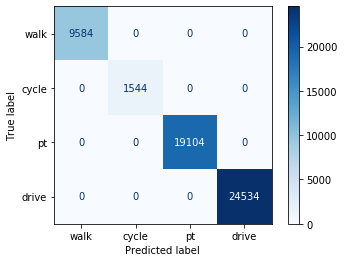

In [24]:
print('Confusion matrix, without normalization:')
display(confusion_matrix(y, dtc.predict(X)))


fig, ax = plt.subplots()
plot_confusion_matrix(dtc, X, y, display_labels=classes,values_format= 'd', cmap=plt.cm.Blues, ax = ax)
plt.show()